# Reducera datamängder med `collapse`

*Av Anders Sundell*

När vi har datamängder med många obserationer från samma enhet kan vi ibland vara intresserade av att uttala oss om mängden som helhet. Vi kanske har individer i kommuner, och vill säga något om snitten i kommunerna. Eller så har vi många observationer av ett land över tid, och vill jämföra länderna som helhet, eller åren. Eller så har vi elever i klasser och vill säga något om klasserna.

I de fallen kan det vara lämpligt att använda sig av kommandot `collapse`. Det låter oss "koka ner" en datamängd, och få ut sammanfattande statistik för enheter som vi väljer.

Vi kan få ut en mängd olika uppgifter. Här är ett urval:

| Kod      | Betydelse            |
|----------|----------------------|
| mean     | Medelvärde           |
| median   | Median               |
| p90      | 90:e percentilen - funkar även med andra siffror, tex p10 eller p25               |
| sd       | Standardavvikelse    |
| sum      | Summa                |
| count    | Antal observationer med giltiga värden  |
| percent  | Andel observationer med giltiga värden  |
| min      | Minsta värde         |
| max      | Största värde         |

Men det finns ännu fler att välja på. Man kan få en fullständig lista genom att skriva `help collapse`.


## Skära kakan åt ena hållet
I det här exemplet ska vi använda oss av QoG-institutets "Basic Time series cross section" dataset, som har information om världens länder, över tid. Varje land är alltså med en gång för varje år. Perioden börjar 1946.

I koden nedan händer tre saker. Först laddas datamängden in, med `use`.

**Sedan kommer det viktiga kommandot `collapse`. Efter själva kommandot kommer `(mean)`, som visar att vi vill spara medelvärden, och vi gör det för variablen `wdi_empagr` (andel anställda inom jordbruket). Sedan kommer ett nytt statistikkommando, `(median)`, som vi vill ha för variabeln `wdi_gdpcapcon2010` (BNP per capita). Vi hade också kunnat lista flera variabler för varje sorts statistikuppgift, eller haft ännu fler olika typer av statistik. Varje parentes innehåller den statistik vi vill ha, följt av variablerna.**

Vi anger också option `by(year)`. Våra statistikuppgifter beräknas en gång för varje värde på variabeln year.

Slutligen gör vi en graf som visar sambandet mellan BNP per capita och andelen anställda inom jordbruket, med `twoway (scatter)`.



(Quality of Government Basic dataset 2018 - Time-Series)


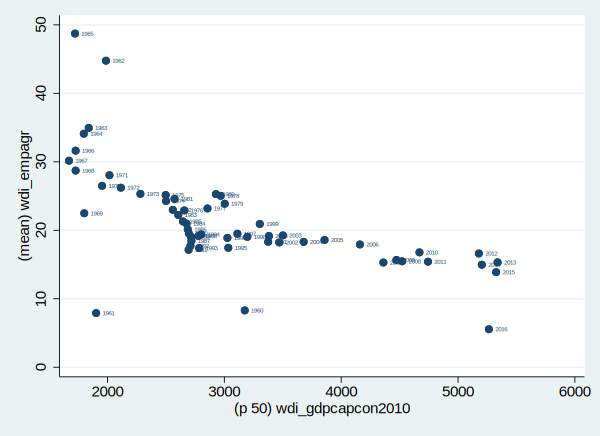

In [2]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear

collapse (mean) wdi_empagr (median) wdi_gdpcapcon2010, by(year)

twoway (scatter wdi_empagr wdi_gdpcapcon2010, mlabel(year) mlabsize(tiny))

Ursprungligen hade vi alltså en observation per land och år. I vår reducerade datamängd har vi nu en observation per år. Vi kan i grafen se att år då BNP per capita varit högre i genomsnitt är andelen anställda i jordbruket lägre i världens länder, i genomsnitt.

## Skära kakan åt andra hållet
Låt oss nu säga att vi ville göra det på ett lite annat sätt. Vi struntar nu i tidsaspekten, och vill titta på landgenomsnitt istället. Vi ska nu ta fram samma uppgifter: medelvärdet för andelen anställda inom jordbruket, och BNP per capita, fast inte beräknat per år, utan för varje land. Vi byter då ut variabelnamnet i `by()`, till landsvariabeln.

Viktigt är att vi nu behöver ladda in den ursprungliga datamängden igen. När man kör `collapse` förstörs den ursprungliga datan. Det gör inget, så länge man inte sparar över sitt dataset. Vi kan bara ladda in det i original och göra om vår analys.


(Quality of Government Basic dataset 2018 - Time-Series)


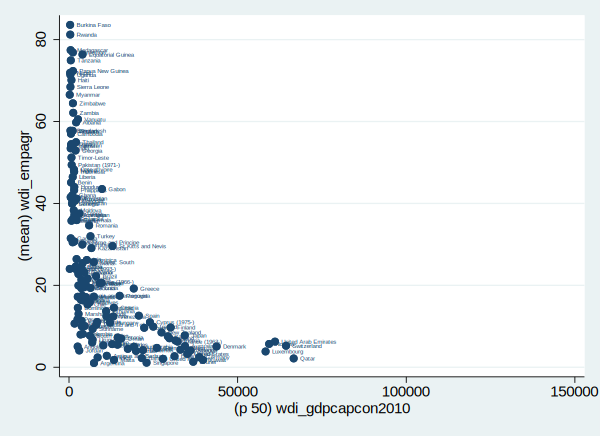

In [4]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear
collapse (mean) wdi_empagr (median) wdi_gdpcapcon2010, by(cname)
twoway (scatter wdi_empagr wdi_gdpcapcon2010, mlabel(cname) mlabsize(tiny))

Den här grafen ser helt annorlunda ut. I den förra var varje prick ett år; nu är det ett land. Vi ser då att i länder som haft hög BNP, i snitt, är det också färre som har arbetat i jordbruket.

## Reducera på två variabler
Vi får alltså ut olika information beroende på vilken variabel vi väljer att kollapsa på. Men vi kan också använda oss av kombinationer av variabler. Säg att vi vill titta på andelen anställda inom jordbruket per år, fast uppdelat på världsdel. Då kan vi ange både en världsdelsvariabel och årsvariabeln i option `by()`. I det här fallet blir det alltså `by(ht_region year)`.

Därefter gör vi en graf som visar utvecklingen av jordbruksanställda år per år för Västeuropa (blå linje) och Afrika söder om Sahara (röd linje).


(Quality of Government Basic dataset 2018 - Time-Series)


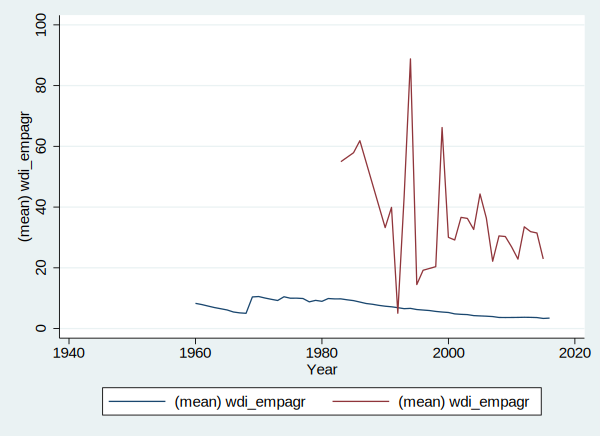

In [5]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear
collapse (mean) wdi_empagr (median) wdi_gdpcapcon2010, by(ht_region year)
twoway (line wdi_empagr year if ht_region==5) (line wdi_empagr year if ht_region==4)

## Avslutning
Collapse är ett väldigt flexibelt verktyg för att visa information från mer komplicerade datastrukturer på ett enkelt sätt. Vi hade till exempel också kunnat ta fram genomsnitt per världsdel och visat det med ett [stapeldiagram](barcharts_sv.html). Tänk bara på att du måste ladda in datamängden igen om du vill jobba med den oreducerade datan!